In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

data = np.asarray(Image.open("index.png").convert("RGB"))

data = data/255
data = data.reshape(data.shape[0]*data.shape[1],3)
data.shape

(407044, 3)

In [27]:
#number of clusters
K = 10
# randomly initialize cluster "heads"
x_res = np.random.rand(K,1)
y_res = np.random.rand(K,1)
z_res = np.random.rand(K,1)

m = np.concatenate((x_res, y_res, z_res), axis=1)
m = m.reshape(K,3)
print(m*255)
#colors = ['r','b','g','k','c','m','y']
#for i in range(K):
#    plt.scatter(x_res[i],y_res[i], color=colors[i],marker='o')

[[229.50741105 191.80488512 167.39856422]
 [229.5910327  214.0978074    6.75351489]
 [149.42817362 223.31311704 160.88080838]
 [178.87459882 247.39234982 130.60038447]
 [254.01891242   9.27900841 211.04124791]
 [143.56287755 106.19397263  83.04451615]
 [ 97.10159708 160.78186841 162.52260061]
 [254.3905982   44.5620992  135.70707505]
 [103.07904791 181.18551862 118.77244901]
 [ 14.87463534 126.79306902 244.27290914]]


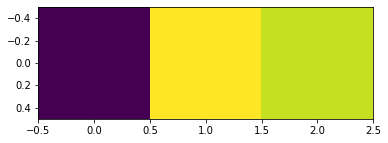

In [8]:
for i in range(K):
    import matplotlib.pyplot as plt
    plt.imshow([[(0, 0, 1)]])
    plt.imshow([(m[i][0], m[i][1], m[i][2])])
 #   plt.show()

In [28]:
def dist(a,b):
    if math.isnan(a[0]) or math.isnan(b[0]):
        return 100000
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2)**2

In [33]:
new_img = np.zeros(data.shape)
sum_in_cluster = np.zeros((K,3))
points_in_cluster = np.zeros(K)
for i,x in enumerate(data):
        dists = np.zeros(K)
        for idx,rp in enumerate(m):
            dists[idx] = dist(x,rp)
        new_img[i] = m[np.argmin(dists)]
        
        sum_in_cluster[np.argmin(dists)] += x
        points_in_cluster[np.argmin(dists)]+=1



In [34]:
new_img.shape
new_img = new_img.reshape((int(np.sqrt(new_img.shape[0])),int(np.sqrt(new_img.shape[0])),3))
new_img.shape

(638, 638, 3)

0.0


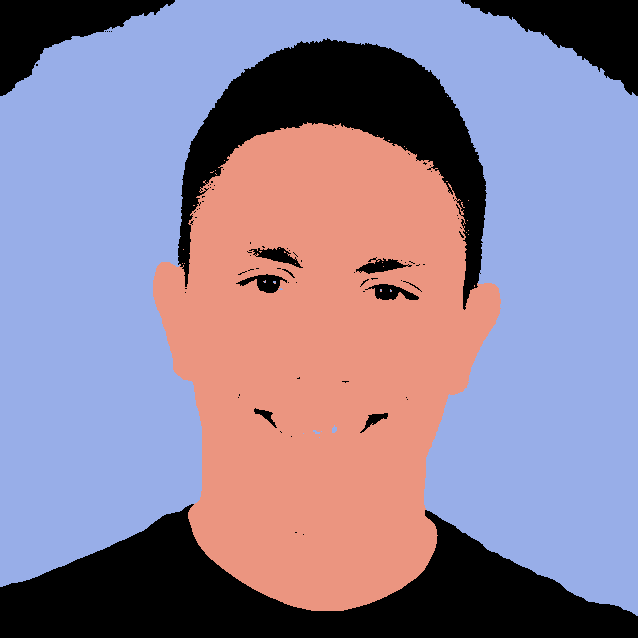

In [35]:
print(new_img[0][0][0]*255)
im = Image.fromarray(np.uint8(new_img*255))
im

In [32]:
print(sum_in_cluster.shape)
print(points_in_cluster.shape)
for k in range(len(sum_in_cluster.shape)):
    sum_in_cluster[k] = sum_in_cluster[k]/points_in_cluster[k]
 
m = sum_in_cluster
print(m)

(10, 3)
(10,)
[[9.25171178e-01 5.86390625e-01 5.05094698e-01]
 [           nan            nan            nan]
 [5.96078431e-01 6.82352941e-01 9.09803922e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.81486392e+04 2.88677765e+04 2.97363647e+04]
 [8.28399294e+04 1.07927024e+05 1.58241957e+05]
 [2.24909020e+03 1.07901961e+03 1.10225098e+03]
 [1.96470588e+00 1.78823529e+00 1.63137255e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


<ipython-input-32-dad20416be89>:4: RuntimeWarning: invalid value encountered in true_divide
  sum_in_cluster[k] = sum_in_cluster[k]/points_in_cluster[k]


[[2.28061544e+02 9.66021181e+00 1.95126506e+02]
 [1.51464686e+02 9.97926460e-01 1.31932816e+02]
 [1.87385667e+07 2.28762512e+07 1.12920545e+07]
 [2.05340075e+07 3.63727102e+07 2.44007875e+07]
 [3.97281486e+06 6.20019621e+06 2.59381372e+06]]
